## Importing  and Exploring Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_excel('Data_Train.xlsx')

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [35]:
data.shape

(10683, 11)

In [36]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [37]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [38]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [39]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [40]:
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [41]:
data.dropna(inplace=True)

In [42]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [43]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

## Exploring Data Analysis (EDA) & Feature Engneering 

Duration split

In [44]:
def convert_Duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][: -1])
        minutes =int(duration.split()[1][: -1])
        return hours*60 + minutes
    else:
        return int(duration[: -1]) * 60
    

In [45]:
data['Duration'] = data['Duration'].apply(convert_Duration)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


Departure & Arrival time

In [46]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data.dtypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_79820\3947326048.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_79820\3947326048.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])


Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [47]:
data['Dep_Time_hours'] = data['Dep_Time'].dt.hour
data['Dep_Time_minutes'] = data['Dep_Time'].dt.minute
data['Arrival_Time_hours'] = data['Arrival_Time'].dt.hour
data['Arrival_Time_hours'] = data['Arrival_Time'].dt.minute

In [48]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-10-20 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,22,20,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-20 05:50:00,2023-10-20 13:15:00,445,2 stops,No info,7662,5,50,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-20 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-10-20 18:05:00,2023-10-20 23:30:00,325,1 stop,No info,6218,18,5,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-10-20 16:50:00,2023-10-20 21:35:00,285,1 stop,No info,13302,16,50,35


In [49]:
#data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [50]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-10-20 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,22,20,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-20 05:50:00,2023-10-20 13:15:00,445,2 stops,No info,7662,5,50,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-20 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-10-20 18:05:00,2023-10-20 23:30:00,325,1 stop,No info,6218,18,5,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-10-20 16:50:00,2023-10-20 21:35:00,285,1 stop,No info,13302,16,50,35


Date of Journey

In [51]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_79820\541364744.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


In [52]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-20 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,22,20,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-20 05:50:00,2023-10-20 13:15:00,445,2 stops,No info,7662,5,50,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-20 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-10-20 18:05:00,2023-10-20 23:30:00,325,1 stop,No info,6218,18,5,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-10-20 16:50:00,2023-10-20 21:35:00,285,1 stop,No info,13302,16,50,35


In [53]:
data['Date_of_Journey'].dt.year.unique()

array([2019])

In [54]:
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month


In [55]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-20 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,22,20,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-20 05:50:00,2023-10-20 13:15:00,445,2 stops,No info,7662,5,50,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-20 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-10-20 18:05:00,2023-10-20 23:30:00,325,1 stop,No info,6218,18,5,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-10-20 16:50:00,2023-10-20 21:35:00,285,1 stop,No info,13302,16,50,35,1,3


In [56]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)


In [57]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-20 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,22,20,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-20 05:50:00,2023-10-20 13:15:00,445,2 stops,No info,7662,5,50,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-20 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-20 18:05:00,2023-10-20 23:30:00,325,1 stop,No info,6218,18,5,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-20 16:50:00,2023-10-20 21:35:00,285,1 stop,No info,13302,16,50,35,1,3


Total stops

In [58]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [59]:
data['Total_Stops'] = data['Total_Stops'].map({
    'non-stop': 0 ,
    '1 stop' : 1 ,
    '2 stops' : 2 ,
    '3 stops' : 3 ,
    '4 stops' : 4
})

In [60]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-20 22:20:00,2023-03-22 01:10:00,170,0,No info,3897,22,20,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-20 05:50:00,2023-10-20 13:15:00,445,2,No info,7662,5,50,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-20 09:25:00,2023-06-10 04:25:00,1140,2,No info,13882,9,25,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-20 18:05:00,2023-10-20 23:30:00,325,1,No info,6218,18,5,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-20 16:50:00,2023-10-20 21:35:00,285,1,No info,13302,16,50,35,1,3


Additional Info 

In [61]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [64]:
data.drop('Additional_Info',axis=1 , inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Dep_Time_hours,Dep_Time_minutes,Arrival_Time_hours,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-10-20 22:20:00,2023-03-22 01:10:00,170,0,3897,22,20,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-20 05:50:00,2023-10-20 13:15:00,445,2,7662,5,50,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-20 09:25:00,2023-06-10 04:25:00,1140,2,13882,9,25,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-10-20 18:05:00,2023-10-20 23:30:00,325,1,6218,18,5,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-10-20 16:50:00,2023-10-20 21:35:00,285,1,13302,16,50,35,1,3


In [65]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

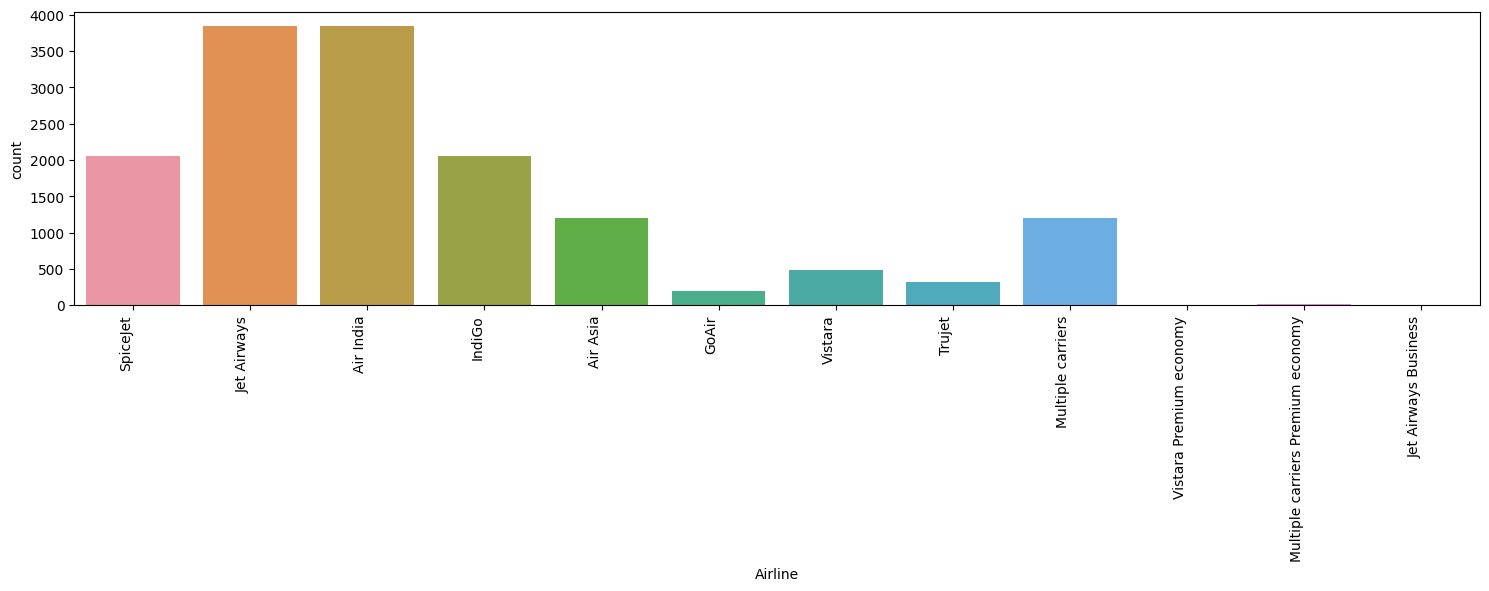

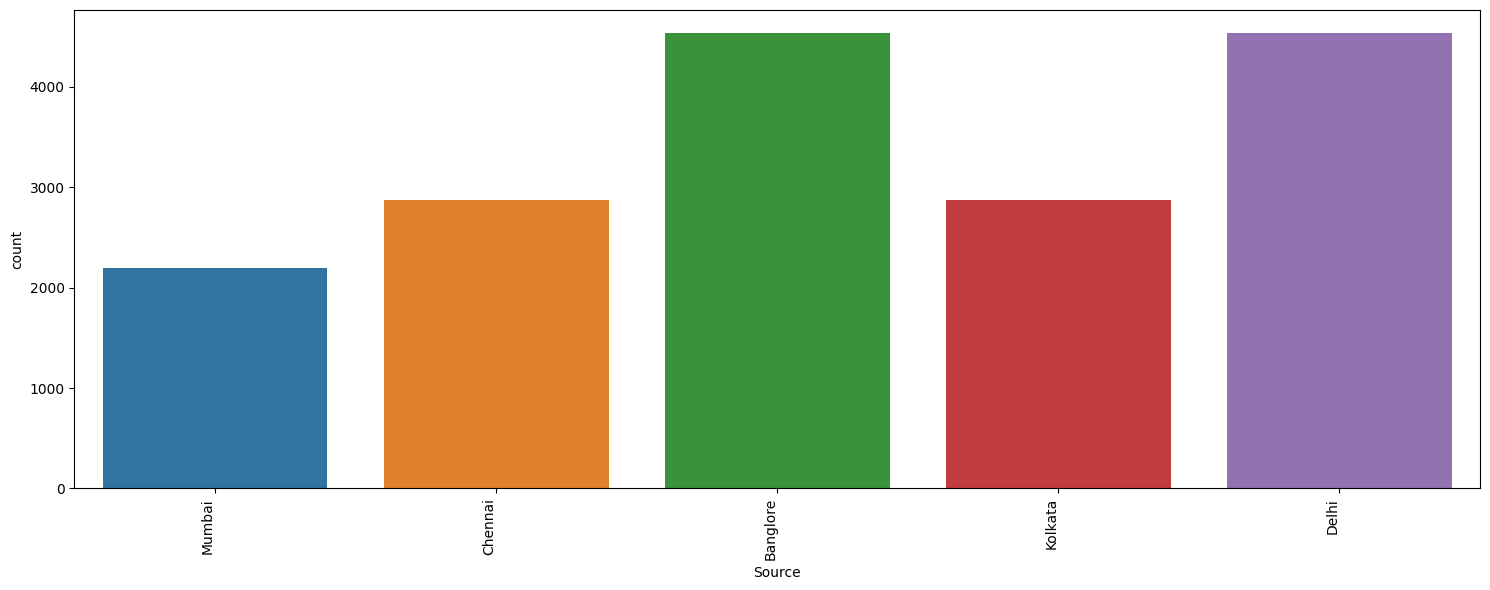

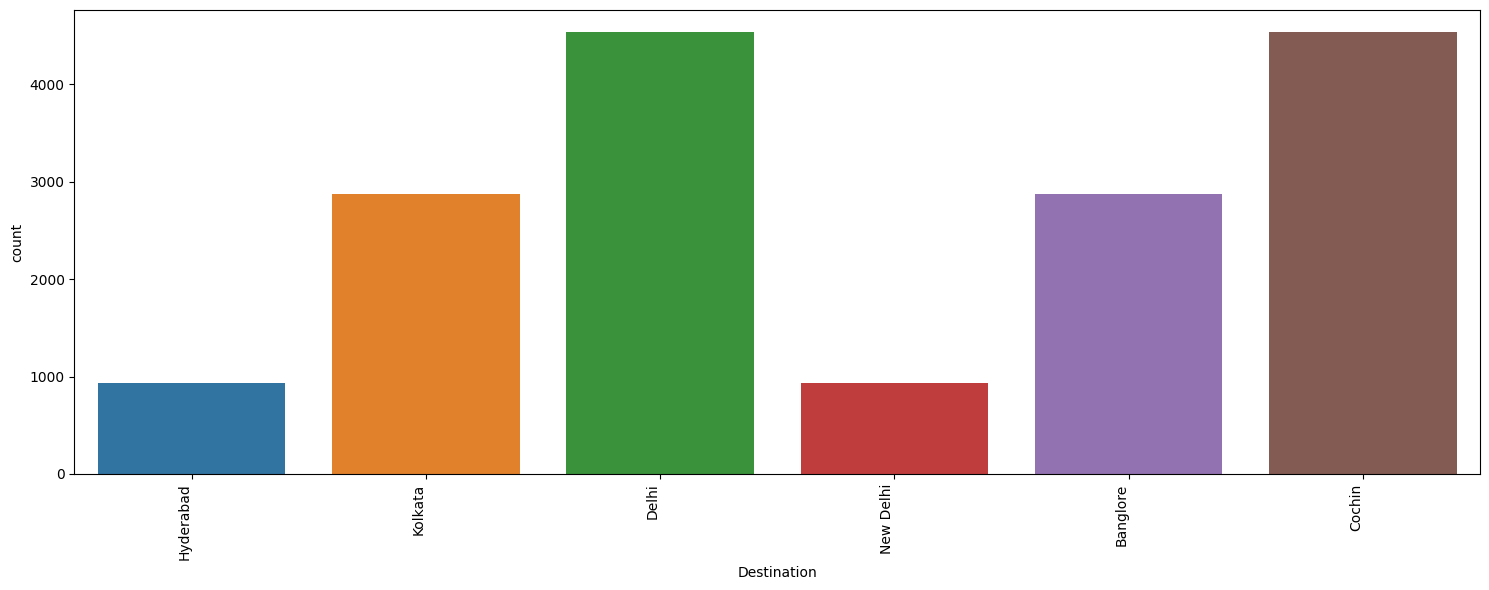

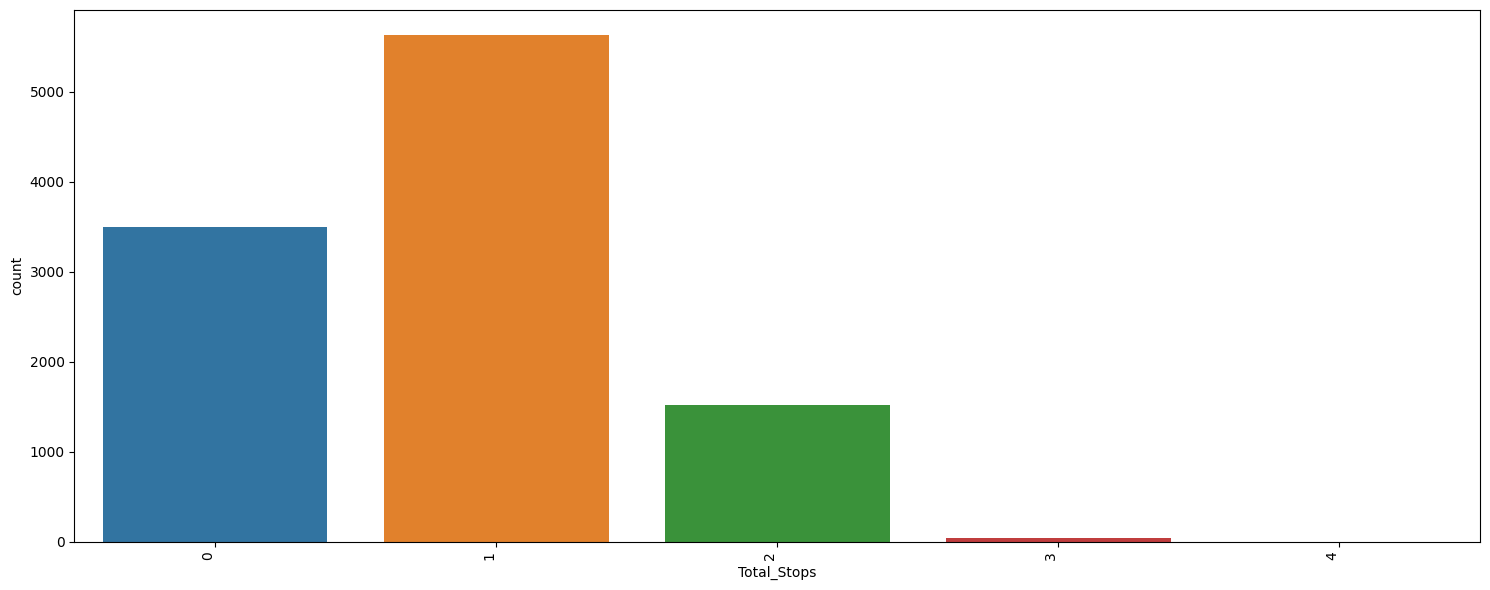

In [71]:
for i in ['Airline' ,'Source' , 'Destination','Total_Stops']:
    plt.figure(figsize=(15,6))
    sns.countplot(data = data , x=i)
    ax = sns.countplot(x = i , data = data.sort_values('Price', ascending=True))
    ax.set_xticklabels(ax.get_xticklabels() ,rotation = 90 , ha ='right')
    plt.tight_layout()
    plt.show()
    print('\n\n')